# Bước 1: Import Thư viện (Library)

In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Bước 2: Hàm Đọc và Tiền xử lý Ảnh 8-bit (Preprocess 8bit file)

In [36]:
# Định nghĩa hàm để đọc ảnh xám 8-bit
def read_grayscale_8bit(path):
    """
    Đọc ảnh từ đường dẫn và trả về dưới dạng ảnh xám 8-bit (NumPy array).
    Ảnh đọc bởi cv2.imread với cờ IMREAD_GRAYSCALE đã là uint8 (0-255).
    """
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # image = cv2.resize(image, (500, 500)) # resize về 500x500

    return image

# Bước 3: Xử lý và Hiển thị Ảnh Gốc (Original)

<ipython-input-37-c7cb08950604>:30: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image_original_gray.flatten(), 256, [0, 256], color = 'r') # Vẽ Histogram (màu đỏ)


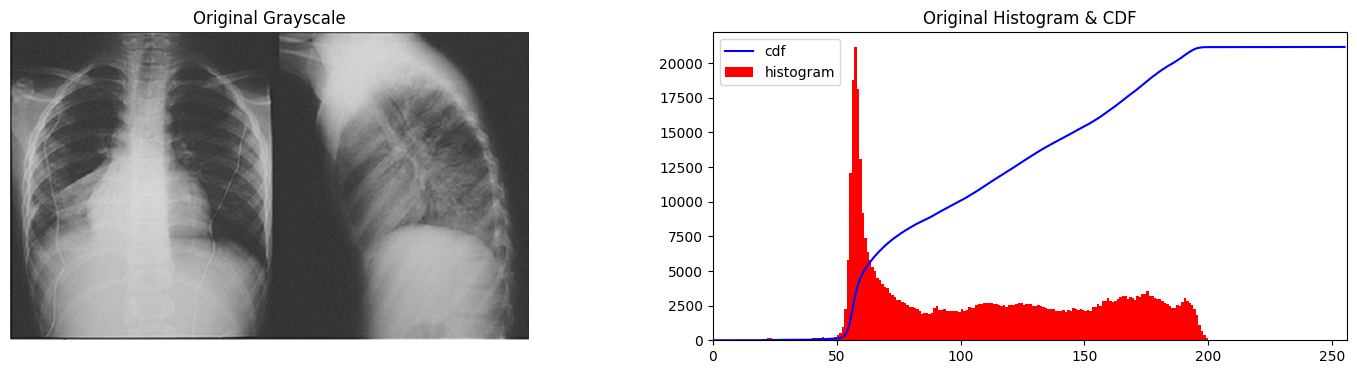

In [37]:
# Đường dẫn tới file ảnh 8-bit (JPG, PNG, etc.)
fpath = "/content/20200216_050257_982888_xquang-tim-phoi.max-1800x1800.png"

# Đọc ảnh bằng hàm đã định nghĩa
image_original_gray = read_grayscale_8bit(fpath)

# ---- Vẽ Ảnh Gốc và Histogram/CDF ----
plt.figure(figsize=(18, 4)) # Tạo cửa sổ đồ thị

# Ô 1: Hiển thị ảnh gốc
plt.subplot(1, 2, 1)       # Grid 1x2, ô thứ 1
plt.imshow(image_original_gray, cmap='gray') # Hiển thị ảnh xám
plt.title("Original Grayscale")
plt.axis("off")            # Ẩn trục tọa độ

# Ô 2: Hiển thị Histogram và CDF
plt.subplot(1, 2, 2)       # Grid 1x2, ô thứ 2

# Tính histogram
hist, bins = np.histogram(image_original_gray.flatten(), 256, [0, 256])

# Tính CDF
cdf = hist.cumsum()

# Chuẩn hóa CDF để vẽ cùng tỷ lệ với histogram (chỉ để hiển thị)
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# Vẽ đồ thị
plt.plot(cdf_normalized, color = 'b') # Vẽ CDF (màu xanh)
plt.hist(image_original_gray.flatten(), 256, [0, 256], color = 'r') # Vẽ Histogram (màu đỏ)
plt.xlim([0, 256])                 # Giới hạn trục x từ 0 đến 256
plt.legend(('cdf','histogram'), loc = 'upper left') # Hiển thị chú thích
plt.title("Original Histogram & CDF")

# Hiển thị đồ thị
plt.show()

# Bước 4: Áp dụng và Hiển thị Histogram Equalization (HE)

<ipython-input-38-7da8914f06dc>:19: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_he.flatten(), 256, [0, 256], color = 'r')


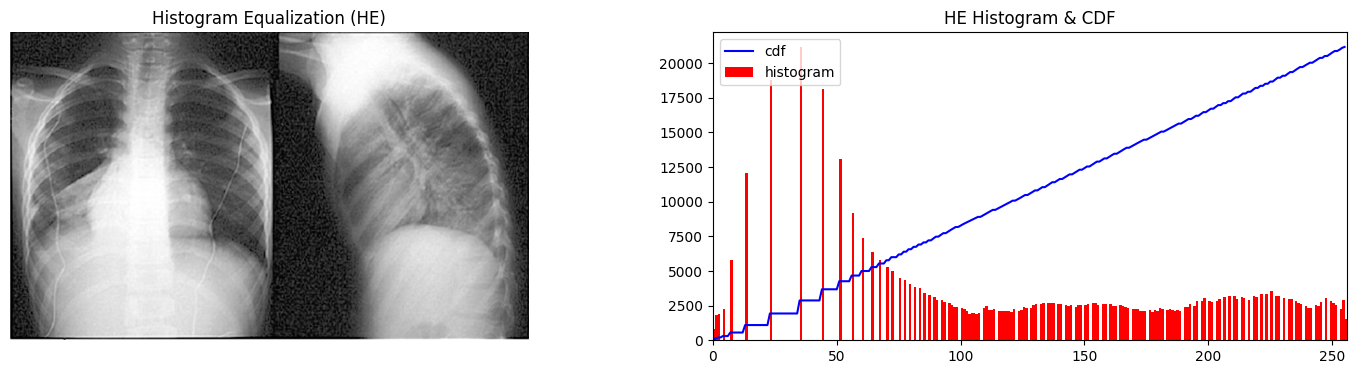

In [38]:
# ---- Thực hiện Histogram Equalization ----
img_he = cv2.equalizeHist(image_original_gray)

# ---- Vẽ Ảnh sau HE và Histogram/CDF ----
plt.figure(figsize=(18, 4))

# Ô 1: Hiển thị ảnh sau HE
plt.subplot(1, 2, 1)
plt.imshow(img_he, cmap='gray')
plt.title("Histogram Equalization (HE)")
plt.axis("off")

# Ô 2: Hiển thị Histogram và CDF của ảnh sau HE
plt.subplot(1, 2, 2)
hist_he, bins_he = np.histogram(img_he.flatten(), 256, [0, 256])
cdf_he = hist_he.cumsum()
cdf_normalized_he = cdf_he * float(hist_he.max()) / cdf_he.max()
plt.plot(cdf_normalized_he, color = 'b')
plt.hist(img_he.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("HE Histogram & CDF")

# Hiển thị đồ thị
plt.show()

# Bước 5: Áp dụng và Hiển thị CLAHE

<ipython-input-39-fd3f29303bac>:23: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_clahe.flatten(), 256, [0, 256], color = 'r')


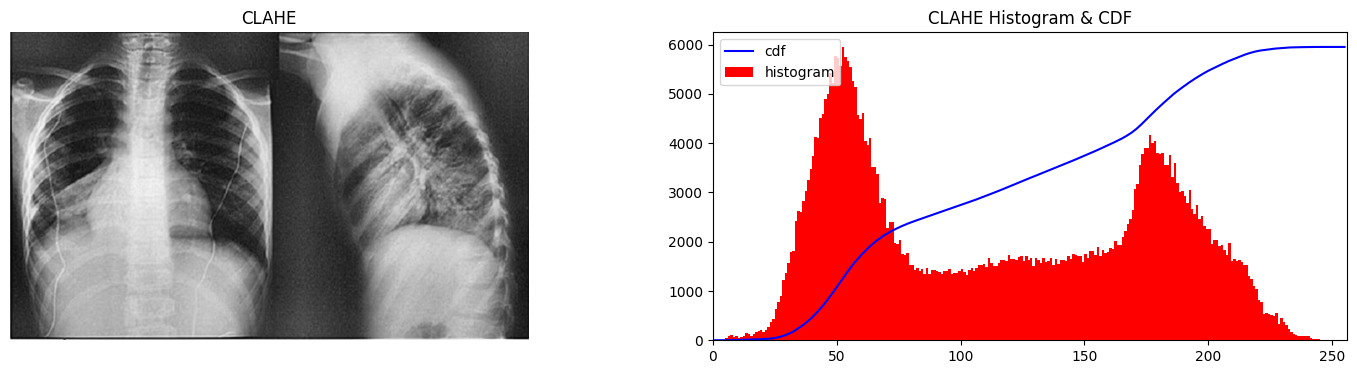

In [39]:
# ---- Thực hiện CLAHE ----
# 1. Tạo đối tượng CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)) # Tham số phổ biến

# clipLimit: Ngưỡng giới hạn độ tương phản. Giá trị cao hơn cho phép tương phản mạnh hơn nhưng có thể tăng nhiễu. 2.0 là giá trị khởi đầu tốt
# tileGridSize: Kích thước lưới các ô mà ảnh sẽ được chia ra để xử lý cục bộ. (8, 8) là một lựa chọn phổ biến.

# 2. Áp dụng CLAHE lên ảnh gốc
img_clahe = clahe.apply(image_original_gray)

# ---- Vẽ Ảnh sau CLAHE và Histogram/CDF ----
plt.figure(figsize=(18, 4))

# Ô 1: Hiển thị ảnh sau CLAHE
plt.subplot(1, 2, 1)
plt.imshow(img_clahe, cmap='gray')
plt.title("CLAHE")
plt.axis("off")

# Ô 2: Hiển thị Histogram và CDF của ảnh sau CLAHE
plt.subplot(1, 2, 2)
hist_clahe, bins_clahe = np.histogram(img_clahe.flatten(), 256, [0, 256])
cdf_clahe = hist_clahe.cumsum()
cdf_normalized_clahe = cdf_clahe * float(hist_clahe.max()) / cdf_clahe.max()
plt.plot(cdf_normalized_clahe, color = 'b')
plt.hist(img_clahe.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("CLAHE Histogram & CDF")

# Hiển thị đồ thị
plt.show()

# Bước 6: So sánh Kết quả Cuối cùng

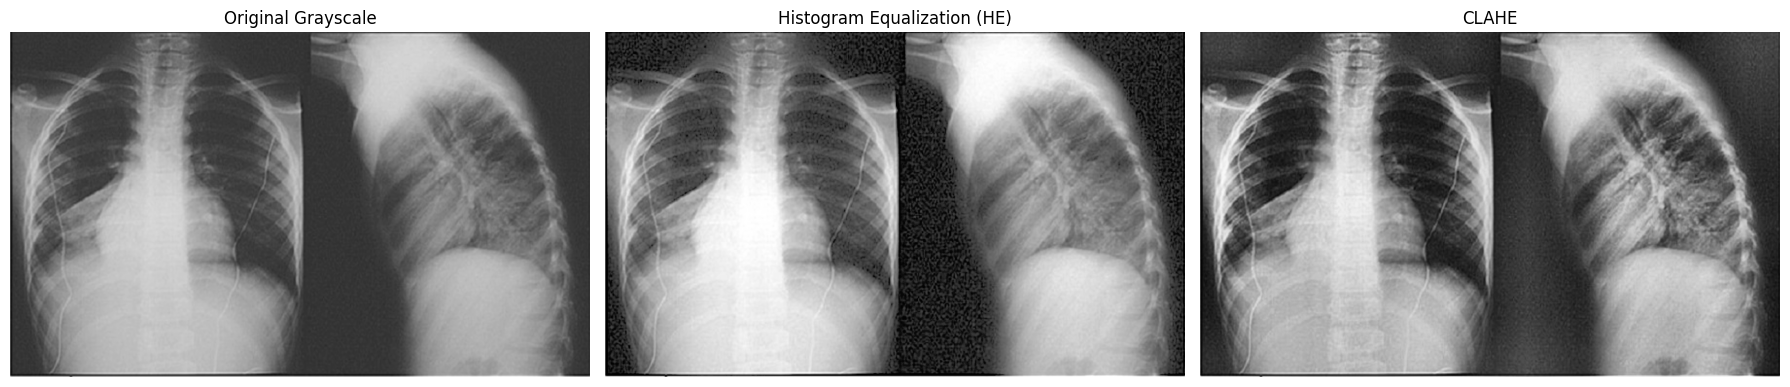

In [40]:
# ---- So sánh 3 ảnh ----
plt.figure(figsize=(18, 6)) # Kích thước phù hợp để hiển thị 3 ảnh

# Ảnh 1: Gốc
plt.subplot(1, 3, 1)
plt.imshow(image_original_gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

# Ảnh 2: HE
plt.subplot(1, 3, 2)
plt.imshow(img_he, cmap='gray')
plt.title("Histogram Equalization (HE)")
plt.axis("off")

# Ảnh 3: CLAHE
plt.subplot(1, 3, 3)
plt.imshow(img_clahe, cmap='gray')
plt.title("CLAHE")
plt.axis("off")

# Tự động điều chỉnh khoảng cách giữa các subplot cho đẹp
plt.tight_layout()
# Hiển thị đồ thị so sánh
plt.show()